ADVANCE MACHINE LEARNING

LAB-3

PRANSHU PARATE 

202211063

IRIS DATASET

In [ ]:
#import thr packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn import svm, datasets

In [ ]:
#load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  
Y = iris.target

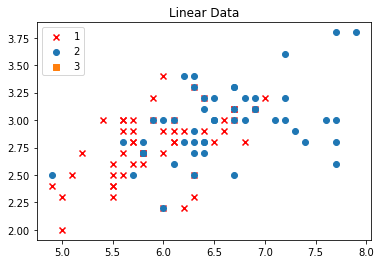

In [ ]:
#plotting the scatter plot
plt.scatter(X[Y==1,0],X[Y==1,1],marker='x',c='r',label='1')
plt.scatter(X[Y==2,0],X[Y==2,1],marker='o',label='2')
plt.scatter(X[Y==3,0],X[Y==3,1],marker='s',label='3')

plt.legend(loc='best')
plt.title('Linear Data')

plt.savefig("LinearData.png")
  
plt.show()

In [ ]:
#splitting of dataset
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [ ]:
#scaling the dataset
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train)

X_train_new=scaler.transform(X_train)
X_test_new=scaler.transform(X_test)

**Hard SVC** - Using large value of C

In [ ]:
model=SVC(C=10**10)
model.fit(X_train_new,y_train)

SVC(C=10000000000)

In [ ]:
#evaluating confusion matrix and accuracy of model 
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = model.predict(X_test_new)
cm = confusion_matrix(y_test,y_pred)
print(cm)
acc = accuracy_score(y_test,y_pred)
print(acc)

[[20  0  0]
 [ 1  8  3]
 [ 0  7  6]]
0.7555555555555555


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000],
              'degree': [2, 3, 4, 5],
              'gamma':[0.001, 0.01, 0.1, 0.5, 1],
              'kernel': ['rbf','poly','linear']
              } 

In [ ]:
grid = GridSearchCV(model, parameters, cv=10)
grid.fit(X_train_new, y_train)
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 5, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=5, degree=2, gamma=1)


In [ ]:
#Evaluating performance metrics 
from sklearn.metrics import classification_report
grid_prediction = grid.predict(X_test_new)
print(classification_report(y_test, grid_prediction))
cm = confusion_matrix(y_test,grid_prediction)
print(cm)
acc = accuracy_score(y_test,grid_prediction)
print(acc)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       0.47      0.67      0.55        12
           2       0.57      0.31      0.40        13

    accuracy                           0.71        45
   macro avg       0.66      0.66      0.64        45
weighted avg       0.71      0.71      0.70        45

[[20  0  0]
 [ 1  8  3]
 [ 0  9  4]]
0.7111111111111111


In [ ]:
def decision_boundary(X,y,model,res,test_idx=None):
    
    markers=['s','o','x']
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    colormap=ListedColormap(colors[:len(np.unique(y))])
    
    x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
    y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
    
    xx,yy=np.meshgrid(np.arange(x_min,x_max,res),np.arange(y_min,y_max,res))
    
    z=model.predict(np.c_[xx.ravel(), yy.ravel()])
    zz=z.reshape(xx.shape)
    
    plt.pcolormesh(xx,yy,zz,cmap=colormap)
#     plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors='k')
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(X[y==cl,0],X[y==cl,1],c=colors[idx],cmap=plt.cm.Paired, edgecolors='k',marker=markers[idx],label=cl,alpha=0.8)

<ipython-input-11-4633923a9bb8>:18: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[y==cl,0],X[y==cl,1],c=colors[idx],cmap=plt.cm.Paired, edgecolors='k',marker=markers[idx],label=cl,alpha=0.8)


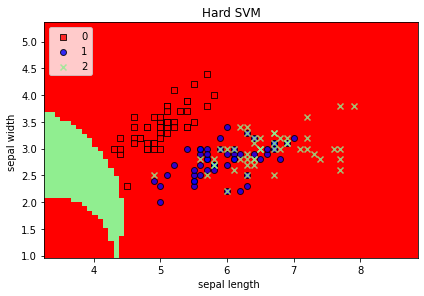

In [ ]:
#plotting decision boundary
decision_boundary(np.vstack((X_train,X_test)),np.hstack((y_train,y_test)),model,0.08,test_idx=None)
plt.xlabel('sepal length ')
plt.ylabel('sepal width ')
plt.legend(loc='upper left')
plt.tight_layout()
plt.title("Hard SVM")
plt.savefig("Hard_SVM.png")
  
plt.show()

**Soft SVC** - Using small value of C

In [ ]:
model_1=SVC(kernel='linear', C=100, random_state=1)
model_1.fit(X_train_new,y_train)

SVC(C=100, kernel='linear', random_state=1)

In [ ]:
#evaluating confusion matrix and accuracy of model 
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = model_1.predict(X_test_new)
cm = confusion_matrix(y_test,y_pred)
print(cm)
acc = accuracy_score(y_test,y_pred)
print(acc)


[[20  0  0]
 [ 0 11  1]
 [ 0  4  9]]
0.8888888888888888


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000],
              'degree': [2, 3, 4, 5],
              'gamma':[0.001, 0.01, 0.1, 0.5, 1],
              'kernel': ['rbf','poly','linear']
              } 

In [ ]:
grid = GridSearchCV(model_1, parameters, cv=10)
grid.fit(X_train_new, y_train)
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 5, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=5, degree=2, gamma=1, random_state=1)


In [ ]:
#Evaluating performance metrics 
from sklearn.metrics import classification_report
grid_prediction = grid.predict(X_test_new)
print(classification_report(y_test, grid_prediction))
cm = confusion_matrix(y_test,grid_prediction)
print(cm)
acc = accuracy_score(y_test,grid_prediction)
print(acc)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       0.47      0.67      0.55        12
           2       0.57      0.31      0.40        13

    accuracy                           0.71        45
   macro avg       0.66      0.66      0.64        45
weighted avg       0.71      0.71      0.70        45

[[20  0  0]
 [ 1  8  3]
 [ 0  9  4]]
0.7111111111111111


<ipython-input-11-4633923a9bb8>:18: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[y==cl,0],X[y==cl,1],c=colors[idx],cmap=plt.cm.Paired, edgecolors='k',marker=markers[idx],label=cl,alpha=0.8)


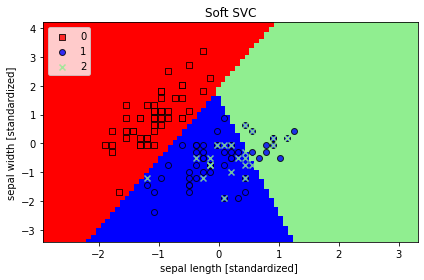

In [ ]:
#plotting decision boundary
decision_boundary(np.vstack((X_train_new,X_test_new)),np.hstack((y_train,y_test)),model_1,0.08,test_idx=None)
plt.xlabel('sepal length [standardized] ')
plt.ylabel('sepal width [standardized]')
plt.legend(loc='upper left')
plt.title('Soft SVC')
plt.tight_layout()

plt.savefig("Soft_SVM.png")
  
plt.show()

In [ ]:
def create_mesh(x,y,res=0.02):
    
    x_min,x_max=x.min()-1,x.max()+1
    y_min,y_max=y.min()-1,y.max()+1
    
    xx,yy=np.meshgrid(np.arange(x_min,x_max,res),np.arange(y_min,y_max,res))
    return xx,yy


def create_contours(ax,clf,xx,yy,**parameters):
    
    z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    zz=z.reshape(xx.shape)
    out = ax.contourf(xx, yy, zz)
    return out

**SVC with kernel**

<ipython-input-20-46548095f8b0>:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X[Y==cl,0],X[Y==cl,1],c=colors[idx],cmap=colormap, edgecolors='k',marker=markers[idx],label=cl,alpha=0.8)
<ipython-input-20-46548095f8b0>:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X[Y==cl,0],X[Y==cl,1],c=colors[idx],cmap=colormap, edgecolors='k',marker=markers[idx],label=cl,alpha=0.8)
<ipython-input-20-46548095f8b0>:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X[Y==cl,0],X[Y==cl,1],c=colors[idx],cmap=colormap, edgecolors='k',marker=m

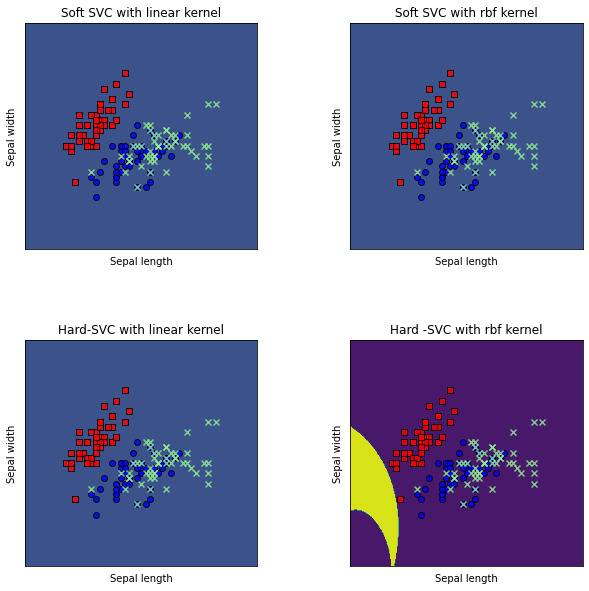

In [ ]:
models = (svm.SVC(kernel='linear', C=1.0),
          svm.SVC(C=1.0),SVC(C=10**10,kernel='linear'),SVC(C=10**10,kernel='rbf'))
models = (clf.fit(X_train_new, y_train) for clf in models)

# title for the plots
titles = ('Soft SVC with linear kernel',
          'Soft SVC with rbf kernel', 'Hard-SVC with linear kernel','Hard -SVC with rbf kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2,figsize=(10,10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

xx,yy=create_mesh(X[:,0], X[:,1])

for clf, title, ax in zip(models, titles, sub.flatten()):
    
    markers=['s','o','x']
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    colormap=ListedColormap(colors[:len(np.unique(Y))])
    
    create_contours(ax, clf, xx, yy,cmap=colormap)
    
    for idx,cl in enumerate(np.unique(Y)):
        ax.scatter(X[Y==cl,0],X[Y==cl,1],c=colors[idx],cmap=colormap, edgecolors='k',marker=markers[idx],label=cl,alpha=0.8)
        
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('Sepal length')
        ax.set_ylabel('Sepal width')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)
plt.savefig("HARD_SOFT_subplots.png")
  
plt.show()

**Experimenting with gamma values**

In [ ]:
## Trying gamma values for Iris data

model=SVC(kernel='linear', C=10.0, random_state=1,gamma=0.2)
model.fit(X_train_new,y_train)

model.score(X_test_new,y_test)

0.8888888888888888

<ipython-input-11-4633923a9bb8>:18: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[y==cl,0],X[y==cl,1],c=colors[idx],cmap=plt.cm.Paired, edgecolors='k',marker=markers[idx],label=cl,alpha=0.8)


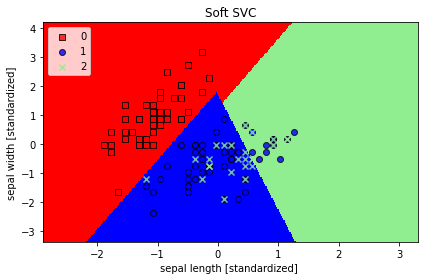

In [ ]:
#plotting the decision boundary
decision_boundary(np.vstack((X_train_new,X_test_new)),np.hstack((y_train,y_test)),model,0.02,test_idx=None)
plt.xlabel('sepal length [standardized] ')
plt.ylabel('sepal width [standardized]')
plt.legend(loc='upper left')
plt.title('Soft SVC')
plt.tight_layout()

plt.savefig("Soft_SVM_linear_data_small_gamma.png")
  
plt.show()

In [ ]:
model=SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
model.fit(X_train_new,y_train)

model.score(X_test_new,y_test)

0.8666666666666667

<ipython-input-11-4633923a9bb8>:18: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[y==cl,0],X[y==cl,1],c=colors[idx],cmap=plt.cm.Paired, edgecolors='k',marker=markers[idx],label=cl,alpha=0.8)


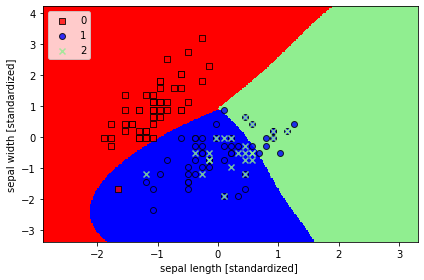

In [ ]:
#plotting the decision boundary
decision_boundary(np.vstack((X_train_new,X_test_new)),np.hstack((y_train,y_test)),model,0.02,test_idx=None)
plt.xlabel('sepal length [standardized] ')
plt.ylabel('sepal width [standardized]')
plt.legend(loc='upper left')
# plt.title('Hard SVC')
plt.tight_layout()

<ipython-input-11-4633923a9bb8>:18: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[y==cl,0],X[y==cl,1],c=colors[idx],cmap=plt.cm.Paired, edgecolors='k',marker=markers[idx],label=cl,alpha=0.8)


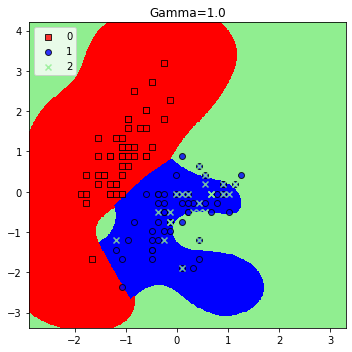

In [ ]:
plt.figure(figsize=(5,5))
model = SVC(kernel='rbf', random_state=1, gamma=1.0, C=10.0)
model.fit(X_train_new,y_train)


decision_boundary(np.vstack((X_train_new,X_test_new)),np.hstack((y_train,y_test)),model,0.02,test_idx=None)
# plt.xlabel('sepal length [standardized] ')
# plt.ylabel('sepal width [standardized]')
plt.title('Gamma=1.0')
plt.legend(loc='upper left')


plt.tight_layout()
plt.savefig("low_gamma.png")
  
# plt.show()

<ipython-input-11-4633923a9bb8>:18: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[y==cl,0],X[y==cl,1],c=colors[idx],cmap=plt.cm.Paired, edgecolors='k',marker=markers[idx],label=cl,alpha=0.8)


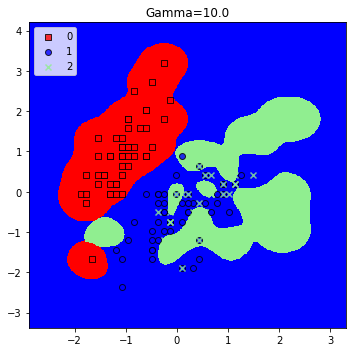

In [ ]:
plt.figure(figsize=(5,5))
model = SVC(kernel='rbf', random_state=1, gamma=10.0, C=10.0)
model.fit(X_train_new,y_train)
decision_boundary(np.vstack((X_train_new,X_test_new)),np.hstack((y_train,y_test)),model,0.02,test_idx=None)
# plt.xlabel('sepal length [standardized] ')
# plt.ylabel('sepal width [standardized]')
plt.title('Gamma=10.0')
plt.legend(loc='upper left')


plt.tight_layout()
plt.savefig("medium_gamma.png")
plt.show()

<ipython-input-11-4633923a9bb8>:18: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[y==cl,0],X[y==cl,1],c=colors[idx],cmap=plt.cm.Paired, edgecolors='k',marker=markers[idx],label=cl,alpha=0.8)


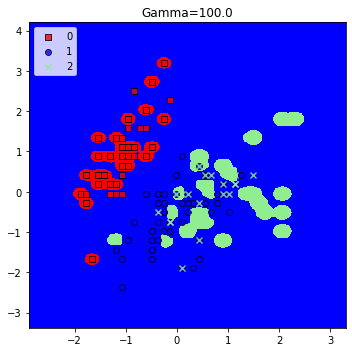

In [ ]:
plt.figure(figsize=(5,5))
model = SVC(kernel='rbf', random_state=1, gamma=100.0, C=10.0)
model.fit(X_train_new,y_train)

#plotting the decision boundary
decision_boundary(np.vstack((X_train_new,X_test_new)),np.hstack((y_train,y_test)),model,0.02,test_idx=None)
# plt.xlabel('sepal length [standardized] ')
# plt.ylabel('sepal width [standardized]')
plt.title('Gamma=100.0')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig("high_gamma.png")
plt.show()

when we increase the value of Gamma the decision boundary becomes non-linear and leads to over-fitting

It is generally preferred to keep Gamma value small in order to have a more 'Generalized Model'.

skimage

In [ ]:
from skimage import data
from skimage.color import rgb2gray
from ipywidgets import interact,interactive,interact_manual
from skimage import img_as_ubyte,img_as_float
import matplotlib.pyplot as plt
import numpy as np
cat = rgb2gray(img_as_float(data.chelsea()))
   

In [ ]:
cat.shape,cat.min(),cat.max()


((300, 451), 0.015120784313725492, 0.7556109803921569)

Extracting data matrix

In [ ]:
cat

array([[0.48523098, 0.48523098, 0.47738784, ..., 0.11692392, 0.11692392,
        0.11692392],
       [0.49699569, 0.49307412, 0.48523098, ..., 0.12336824, 0.1225349 ,
        0.1272898 ],
       [0.50849255, 0.50457098, 0.49475569, ..., 0.12336039, 0.12728196,
        0.13120353],
       ...,
       [0.24786745, 0.29884784, 0.40501294, ..., 0.58914824, 0.58914824,
        0.58914824],
       [0.38173647, 0.42487373, 0.39628392, ..., 0.57403529, 0.57403529,
        0.57795686],
       [0.42487373, 0.36883294, 0.36042431, ..., 0.55442745, 0.55442745,
        0.55834902]])

Plotting Image

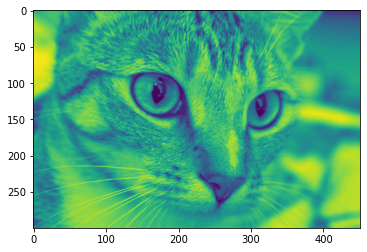

In [ ]:
plt.imshow(cat)

In [ ]:
import numpy as np
from numpy.linalg import svd
from IPython.display import Image

Rank K approximation of the Image for K = 10,20,30,40

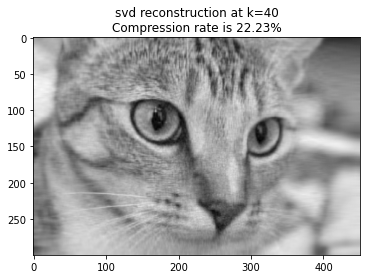

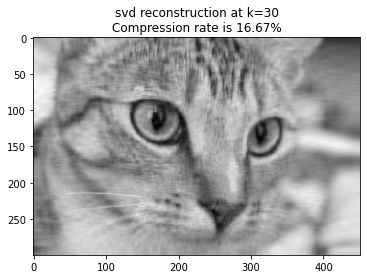

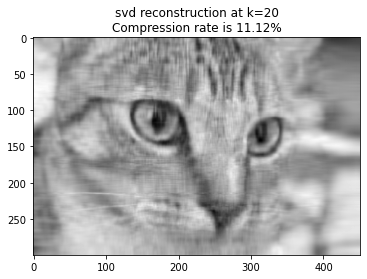

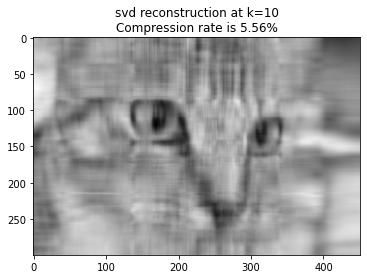

In [ ]:
def svd_reconstruct(M, k):
    u, s, vh = np.linalg.svd(M, full_matrices=True)
    m = 300
    n = 451

    U_k = u[: , :k]
    s_k = s[:k]
    S_k = np.diag(s_k)
    Vh_k = vh[:k]
    originalSize = m * n 
    compressedSize = k * (1 + m + n)
    ratio = compressedSize * 1.0 / originalSize
    
    string2 = 'Compression rate is ' + str( round(ratio * 100 ,2)) + '%' 
    rank_k_approximation = np.dot(U_k, np.dot(S_k, Vh_k))
    return rank_k_approximation,originalSize,compressedSize,ratio,string2
k_ranges = [40, 30, 20, 10]
for k in k_ranges:
    plot = plt.figure()
    reconstruct_image,originalImageSize,CompressedImageSize,Ratio,CompressionRate = svd_reconstruct(cat, k)
    r = plt.imshow(reconstruct_image, cmap ='gray')
    plt.title('svd reconstruction at k=' + str(k) + '\n' + CompressionRate) 
    
    
plt.show()


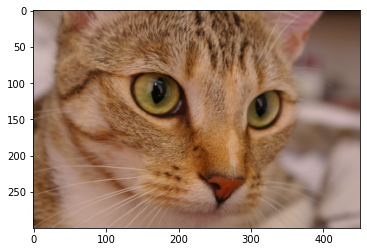

In [ ]:
catrgb = img_as_float(data.chelsea())
catrgb.shape
plt.imshow(catrgb)

Convert

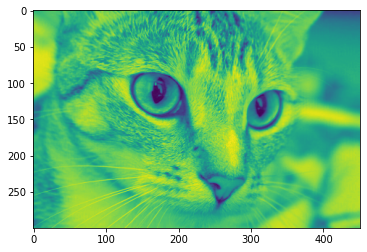

In [ ]:
catrgb = np.array(catrgb)
catrgb[catrgb == 255] = 1
BinaryNP = catrgb[:,:,0]
plt.imshow(BinaryNP)

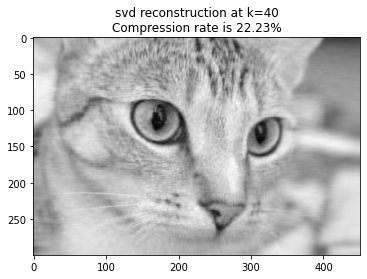

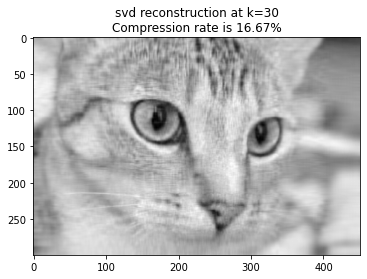

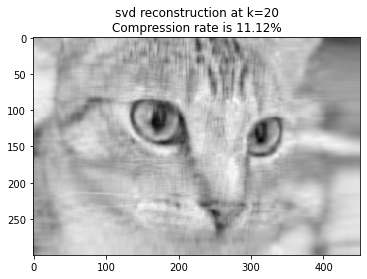

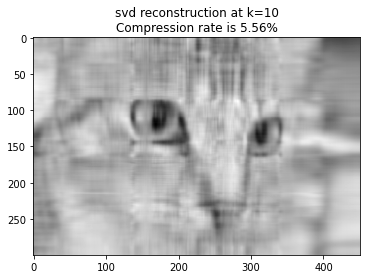

In [ ]:
k_ranges = [40, 30, 20, 10]
for k in k_ranges:
    plot = plt.figure()
    reconstruct_image,originalImageSize,CompressedImageSize,Ratio,CompressionRate = svd_reconstruct(BinaryNP, k)
    r = plt.imshow(reconstruct_image, cmap ='gray')
    plt.title('svd reconstruction at k=' + str(k) + '\n' + CompressionRate) 
    
    
plt.show()